In [1]:
import pandas as pd
from pathlib import PurePath, Path

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from typing import List, Tuple
from time import sleep, perf_counter

In [3]:
from vision_detector import VisionDetector
from game_controller import GameController

vision = VisionDetector()
game = GameController(vision)


game.calibrate_game_settings()

# frame = vision.capture_frame()

# # game_system_settings_btn_center = (400, 240)
# gss_cam_closer_btn_center = (385, 315)
# gss_fog_light_btn_center = (475, 342)

# # game_game_settings_btn_center = (400, 270)
# ggs_hide_chat_btn_center = (425, 165)
# ggs_name_items_only = (490, 200)

# # game.calibrate_game_settings()

# ax = plt.gca()
# ax.xaxis.set_minor_locator(plt.MultipleLocator(50))  # Set x minor ticks at 0.1 intervals
# ax.yaxis.set_minor_locator(plt.MultipleLocator(50))  # Set y minor ticks at 0.05 intervals
# plt.grid(which='both', alpha=0.3, color='green')
# plt.imshow(frame)

# # plt.plot([game_system_settings_btn_center[0]], [game_system_settings_btn_center[1]], marker='x', markersize=10, color="red")
# # plt.plot([gss_cam_closer_btn_center[0]], [gss_cam_closer_btn_center[1]], marker='x', markersize=10, color="red")
# # plt.plot([gss_fog_light_btn_center[0]], [gss_fog_light_btn_center[1]], marker='x', markersize=10, color="pink")

# # plt.plot([game_game_settings_btn_center[0]], [game_game_settings_btn_center[1]], marker='x', markersize=10, color="green")
# plt.plot([ggs_hide_chat_btn_center[0]], [ggs_hide_chat_btn_center[1]], marker='x', markersize=10, color="red")
# plt.plot([ggs_name_items_only[0]], [ggs_name_items_only[1]], marker='x', markersize=10, color="pink")

# plt.show()

# assert False

2024-03-03 18:19:12.116 | INFO     | vision_detector:__init__:59 - Window size: self.w=816 self.h=639
2024-03-03 18:19:12.118 | INFO     | vision_detector:__init__:70 - Window size after crop: self.w=800 self.h=601
2024-03-03 18:19:12.132 | INFO     | game_controller:_start_delay:256 - Starting in 5 seconds...


In [4]:
# from vision_detector import VisionDetector

# vision = VisionDetector()

# frame = vision.capture_frame()

# exp_circles_roi_center = (210, 580)
# # exp_circles_roi_center_global = vision.get_global_pos(exp_circles_roi_center)

# plt.imshow(frame)
# plt.plot([exp_circles_roi_center[0]], [exp_circles_roi_center[1]], marker='x', markersize=15, color="red")
# plt.show()

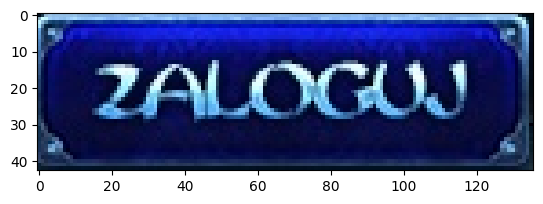

NameError: name 'frame' is not defined

2024-03-03 18:27:35.968 | INFO     | game_controller:exit:356 - Exiting...


In [5]:
plt.imshow(vision.target_templates["zaloguj_button"])
plt.show()

login_btn_detected, conf, login_btn_center = vision.detect_login_button(frame)
login_btn_global_center = vision.get_global_pos(login_btn_center)

first_load_credentials_btn_center = (440, 360)

plt.title(f"{login_btn_detected=}\n{login_btn_global_center=}\n{conf=:.4f}")

ax = plt.gca()
ax.xaxis.set_minor_locator(plt.MultipleLocator(10))  # Set x minor ticks at 0.1 intervals
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))  # Set y minor ticks at 0.05 intervals
plt.grid(which='both', alpha=0.3, color='pink')

plt.plot([login_btn_center[0]], [login_btn_center[1]], marker="x", markersize=20, linewidth=1, color="red")
for cred_idx in range(6):
    plt.plot([first_load_credentials_btn_center[0]], [first_load_credentials_btn_center[1] + cred_idx * 40], marker="x", markersize=10, linewidth=1, color="pink")

plt.imshow(frame)
plt.show()

In [ ]:
# import os

# game_exe_path = r"D:\Gry\ValiumAkademia\valium.exe"
# game_dir = os.path.dirname(game_exe_path)  # Assumes the game's working directory is its location.

# def open_game():
#     # Set the working directory to the game's directory and run as admin.
#     command = fr'Powershell -Command "&{{Set-Location -Path {game_dir}; Start-Process "{game_exe_path}" -Verb RunAs}}"'
#     os.system(command)

# open_game()

In [ ]:
from game_controller import GameController

game = GameController(vision_detector=vision, start_delay=3, saved_credentials_idx=1)

game.login()
game.exit()

In [ ]:
assert False

In [ ]:
butelka_dywizji_template_fpath = r"C:\Users\jedrz\OneDrive\Documents\metin2_vision_bot\data\target_templates\items\butelka_dywizji.png"
butelka_dywizji_template = cv2.imread(butelka_dywizji_template_fpath, cv2.IMREAD_UNCHANGED)[...,:3]  # with drop alpha channel
butelka_dywizji_template_gray = cv2.cvtColor(butelka_dywizji_template, cv2.COLOR_BGR2GRAY)

template_w, template_h = butelka_dywizji_template.shape[:2][::-1]

plt.figure(figsize=(1, 3))
plt.imshow(butelka_dywizji_template)
plt.show()

In [ ]:
# chatowe

def detect_empty_slots_and_centroids(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the image to get the slots as white on a black background.
    _, binary_image = cv2.threshold(gray_image, 15, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out contours that don't match the size and shape of an inventory slot
    slot_contours = []
    for contour in contours:
        # Calculate contour area and filter out small areas
        area = cv2.contourArea(contour)
        # if area < 400 or area > 1000:  # Inventory slots should fall within this range
        #     continue
        if area < 400 or area > 1800:  # Inventory slots should fall within this range
            continue
        

        # Get the bounding rectangle for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Inventory slots are more or less square, with the width and height being similar
        if 0.8 < w/h < 1.2:
            # Check if the slot is in the lower right part (which is the inventory area)
            if (630 < x) and (210 < y < 550):
                slot_contours.append(contour)

    # Calculate centroids for the filtered contours
    centroids = []
    for contour in slot_contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            centroids.append((cX, cY))

    # Draw detected slot contours and centroids on the image
    annotated_image = image.copy()
    cv2.drawContours(annotated_image, slot_contours, -1, (0, 255, 0), 2)
    for (cX, cY) in centroids:
        cv2.circle(annotated_image, (cX, cY), 5, (255, 0, 0), -1)

    return annotated_image, centroids

# Detect empty slots and calculate centroids
annotated_image_with_centroids, centroids = detect_empty_slots_and_centroids(img_fpath)
plt.imshow(annotated_image_with_centroids)

slot1_center = (650, 215)
slot2_center = (690, 215)
slot3_center = (730, 215)
slot4_center = (770, 215)
confirmation_btn_center = (360, 320)

plt.plot([slot1_center[0]], [slot1_center[1]], marker="x", markersize=10, linewidth=1, color="lightblue")
plt.plot([slot2_center[0]], [slot2_center[1]], marker="x", markersize=10, linewidth=1, color="red")
plt.plot([slot3_center[0]], [slot2_center[1]], marker="x", markersize=10, linewidth=1, color="pink")
plt.plot([slot4_center[0]], [slot4_center[1]], marker="x", markersize=10, linewidth=1, color="yellow")
plt.plot([confirmation_btn_center[0]], [confirmation_btn_center[1]], marker="x", markersize=20, linewidth=1, color="green")

plt.show()

In [ ]:
img_fpath = r"D:\Gry\ValiumAkademia\screenshot\0226_224343.jpg"
fill_color = (0, 0, 0)
thickness = -1

frame = cv2.imread(img_fpath, cv2.IMREAD_COLOR)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

frame = cv2.rectangle(frame, (0, 0), (260, 90), fill_color, thickness)  # mask effects roi
frame = cv2.rectangle(frame, (0, 170), (120, 350), fill_color, thickness)  # mask quests roi
frame = cv2.rectangle(frame, (0, 600), (800, 530), fill_color, thickness)  # mask low bar
frame = cv2.rectangle(frame, (640, 600), (800, 0), fill_color, thickness)  # mask minimap; right bar
frame = cv2.rectangle(frame, (100, 530), (700, 500), fill_color, thickness)  # mask rest of the chat

plt.imshow(frame)
plt.show()

In [ ]:
def _find_by_template(frame: np.array, template_img: np.array, confidence_threshold: float) -> Tuple[bool, float, Tuple[int, int]]:
    result = cv2.matchTemplate(frame, template_img, cv2.TM_CCOEFF_NORMED)
    _, confidence, _, loc = cv2.minMaxLoc(result)
    active = confidence >= confidence_threshold
    return active, confidence, loc

def drop_alpha_channel(frame: np.array) -> np.array:
    return frame[...,:3]


SS_DIR = Path(r"C:\Users\jedrz\OneDrive\Documents\metin2_vision_bot\data\datasets\runo_lesne_dropped")
CONF = 0.95
MIN_GRAYSCALE_THRESHOLD = 254  # only white pixels

template_img = cv2.imread(r"C:\Users\jedrz\OneDrive\Documents\metin2_vision_bot\data\target_templates\items\runo_lesne_dropped.png", cv2.IMREAD_UNCHANGED)
template_img = drop_alpha_channel(template_img)


template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
_, binarized_template_img = cv2.threshold(template_gray, MIN_GRAYSCALE_THRESHOLD, 255, cv2.THRESH_BINARY)
template_w, template_h = binarized_template_img.shape[::-1]

plt.imshow(binarized_template_img, cmap="gray")
plt.title(f"width: {template_w}, height: {template_h}")
plt.show()

for img_fpath in SS_DIR.iterdir():
    img_src = cv2.imread(str(img_fpath), cv2.IMREAD_COLOR)
    # img_rgb = cv2.cvtColor(img_src, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)

    _, binarized_img = cv2.threshold(img_gray, MIN_GRAYSCALE_THRESHOLD, 255, cv2.THRESH_BINARY)

    active, confidence, loc = _find_by_template(binarized_img, binarized_template_img, CONF)
    x, y = loc
    item_center_x = x + template_w // 2
    item_center_y = y + template_h // 2

    plt.figure(figsize=(16, 9))
    plt.title(f"{img_fpath.name} - {active} - {confidence:.4f}")
    plt.imshow(binarized_img, cmap="gray")
    plt.plot([item_center_x], [item_center_y], marker="x", markersize=25, markeredgecolor="red", markerfacecolor="green")
    plt.axis("off")

plt.show()